# Machine Learning - Exercise 7
# Kernel Methods

##Import 

Import libraries that contains the implementations of the functions used in the rest of the program.



In [ ]:
import random
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score



print("Libraries imported.")

Libraries imported.


# Classification data set


Data-generation function

In [ ]:
# Param: n=size of data set, outliers=True/False
def generateData(n, outliers=False):
    X = np.ndarray((n,2))
    t = np.ndarray((n,1))
    n1 = int(n*0.5)

    # define random centers of distributions far away
    
    for i in range(0,n1):
        X[i,:] = np.random.normal((2.0,8.5),0.5,size=(1,2))
        t[i] = -1
    for i in range(n1,n):
        X[i,:] = np.random.normal((4.0,5.0),0.3,size=(1,2))
        t[i] = 1
    
    if (outliers):
        no=int(n*0.9)
        for i in range (no,n):
            X[i,:] = np.random.normal((9.0,3.0),0.2,size=(1,2))
            t[i] = 1

    return [X,t]

Generate n data points with/without outliers

In [ ]:
n = 100
outliers = True
np.random.seed(123)

X, t = generateData(n, outliers=outliers)

# print specs
print("Input shape: %s" %str(X.shape))
print("Output shape: %s" %str(t.shape))
print("Number of attributes/features: %d" %(X.shape[1]))
print("Number of classes: %d" %(len(np.unique(t))))
print("Number of samples: %d" %(X.shape[0]))

# show an example
id = random.randrange(0,X.shape[0])

print("Example:")
print("x%d = %r" %(id,X[id]))
print("y%d = %r" %(id,t[id]))

Input shape: (100, 2)
Output shape: (100, 1)
Number of attributes/features: 2
Number of classes: 2
Number of samples: 100
Example:
x6 = array([2.74569481, 8.180549  ])
y6 = array([-1.])


# Classification model

Choose among different kernel functions for the SVM classifier [info](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC):
* Linear
* Polynomial
* Radial Basis Function (RBF)
* Sigmoid

In [ ]:
kernel_name  = 'poly' # 'linear', 'poly', 'rbf', 'sigmoid'

classifier = svm.SVC(C=1.0, kernel=kernel_name, degree=3, gamma='scale')

Fit classifier

In [ ]:
# train the classifier
classifier.fit(X,t)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Visualize results

Define visualization functions

In [ ]:
# Plot data
def plotData(X,t,XNr=None,XNg=None,label='Data'):
    Xr = np.ndarray((0,2))
    Xg = np.ndarray((0,2))
    for i in range(0,len(X)):
        if (t[i][0]==1):
            Xr = np.vstack([Xr, [X[i,0],X[i,1]]])
        else:
            Xg = np.vstack([Xg, [X[i,0],X[i,1]]])
            
    if (not XNr is None):
        plt.plot(XNr[:,0],XNr[:,1],'.', color='#FFAAAA')
    if (not XNg is None):
        plt.plot(XNg[:,0],XNg[:,1],'.', color='#AAFFAA')

    plt.plot(Xr[:,0],Xr[:,1],'ro')
    plt.plot(Xg[:,0],Xg[:,1],'go')
    plt.axis([0,10,0,10])
    plt.title(label)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()
    
# Plot results of a solution
def plotResult(X, t, clf, label):
    XNr = np.ndarray((0,2))
    XNg = np.ndarray((0,2))

    for u in np.arange(0,10,0.1):
        for v in np.arange(0,10,0.1):
            xn = np.array([[u, v]])
            yn = clf.predict(xn)
            if (yn<0):
                XNg = np.vstack([XNg, [u,v]])
            else:
                XNr = np.vstack([XNr, [u,v]])
        
    plotData(X,t,XNr,XNg,label)

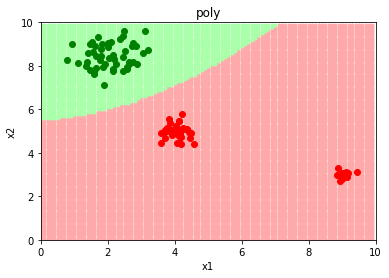

In [ ]:
# show results
plotResult(X,t,classifier,kernel_name)

# Regression data set

In [ ]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

print('Dataset: diabetes')
print('Number of features: %d' %diabetes.data.shape[1])
print('Number of samples: %d' %diabetes.data.shape[0])

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]


# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

print('Training set size: %d' %len(diabetes_X_train))
print('Test set size: %d' %len(diabetes_X_test))

Dataset: diabetes
Number of features: 10
Number of samples: 442
Training set size: 422
Test set size: 20


# Regression model

Choose among different kernel functions for the SVM regressor [info](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR):
* Linear
* Polynomial
* Radial Basis Function (RBF)
* Sigmoid

In [ ]:
kernel_name  = 'poly' # 'linear', 'poly', 'rbf', 'sigmoid'

regressor = svm.SVR(C=1.0, kernel=kernel_name, degree=3, gamma='scale')

Fit regressor

In [ ]:
regressor.fit(diabetes_X_train, diabetes_y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# Regression prediction

In [ ]:
# Make predictions using the testing set
diabetes_y_pred = regressor.predict(diabetes_X_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

Mean squared error: 3174.68
Variance score: 0.34


# Visualize results

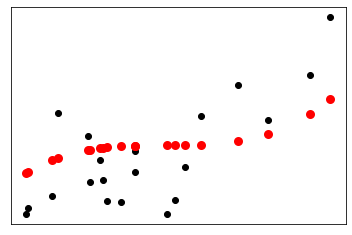

In [ ]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.scatter(diabetes_X_test, diabetes_y_pred, color='red', linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()

# Home Exercises

**Question 1**

Test the SVM classifier with different kernel functions on the Iris and Wine datasets. Perform a grid search to provide the best configuration of the hyper-parameters.

**Question 2** 

Test the SVM regressor with different kernel functions on the full diabetes dataset. Perform a grid search to provide the best configuration of the hyper-parameters.

